consultar tabla STR

In [3]:
import sqlite3

# Crear conexión SQL a la base SQLite
conexión = sqlite3.connect("portal_mammals.sqlite")

consulta = conexión.cursor()

# Un "cursor.execute" debe ser repetir por fila
for row in consulta.execute('SELECT * FROM species;'):
    print(row)

# Cierre de conexión
conexión.close()

('AB', 'Amphispiza', 'bilineata', 'Bird')
('AH', 'Ammospermophilus', 'harrisi', 'Rodent')
('AS', 'Ammodramus', 'savannarum', 'Bird')
('BA', 'Baiomys', 'taylori', 'Rodent')
('CB', 'Campylorhynchus', 'brunneicapillus', 'Bird')
('CM', 'Calamospiza', 'melanocorys', 'Bird')
('CQ', 'Callipepla', 'squamata', 'Bird')
('CS', 'Crotalus', 'scutalatus', 'Reptile')
('CT', 'Cnemidophorus', 'tigris', 'Reptile')
('CU', 'Cnemidophorus', 'uniparens', 'Reptile')
('CV', 'Crotalus', 'viridis', 'Reptile')
('DM', 'Dipodomys', 'merriami', 'Rodent')
('DO', 'Dipodomys', 'ordii', 'Rodent')
('DS', 'Dipodomys', 'spectabilis', 'Rodent')
('DX', 'Dipodomys', 'sp.', 'Rodent')
('EO', 'Eumeces', 'obsoletus', 'Reptile')
('GS', 'Gambelia', 'silus', 'Reptile')
('NL', 'Neotoma', 'albigula', 'Rodent')
('NX', 'Neotoma', 'sp.', 'Rodent')
('OL', 'Onychomys', 'leucogaster', 'Rodent')
('OT', 'Onychomys', 'torridus', 'Rodent')
('OX', 'Onychomys', 'sp.', 'Rodent')
('PB', 'Chaetodipus', 'baileyi', 'Rodent')
('PC', 'Pipilo', 'chlorur

consultar tabla numerica

In [19]:
import pandas as pd
import sqlite3

conexión = sqlite3.connect("portal_mammals.sqlite")
df = pd.read_sql_query("SELECT * from surveys", conexión)
df = df.dropna()
print(df)

conexión.close()

       record_id  month  day  year  plot_id species_id   sex  hindfoot_length  \
0              1      7   16  1977        2         NL     M             32.0   
1              2      7   16  1977        3         NL     M             33.0   
2              3      7   16  1977        2         DM     F             37.0   
3              4      7   16  1977        7         DM     M             36.0   
4              5      7   16  1977        3         DM     M             35.0   
...          ...    ...  ...   ...      ...        ...   ...              ...   
35544      35545     12   31  2002       15         AH  None              NaN   
35545      35546     12   31  2002       15         AH  None              NaN   
35546      35547     12   31  2002       10         RM     F             15.0   
35547      35548     12   31  2002        7         DO     M             36.0   
35548      35549     12   31  2002        5       None  None              NaN   

       weight  
0         N

consultar estadisticas

In [11]:
import sqlite3
import pandas as pd

conexion = sqlite3.connect("portal_mammals.sqlite")

consulta = "SELECT hindfoot_length, weight from filtro_surveys1900;"
datos = pd.read_sql_query(consulta, conexion)

# Eliminar valores nulos
datos = datos.dropna()
medidas_resumen = datos.describe()

# Cierre de conexion
conexion.close()
print(medidas_resumen)

       hindfoot_length        weight
count     23690.000000  23690.000000
mean         27.908527     36.570874
std           8.394176     30.031813
min           6.000000      4.000000
25%          20.000000     19.000000
50%          32.000000     35.000000
75%          36.000000     46.000000
max          40.000000    278.000000


In [13]:
import sqlite3
import pandas as pd

conexion = sqlite3.connect("portal_mammals.sqlite")

consulta = "SELECT hindfoot_length, weight from surveys2000;"
datos = pd.read_sql_query(consulta, conexion)

# Eliminar valores nulos
datos = datos.dropna()
medidas_resumen = datos.describe()

# Cierre de conexion
conexion.close()
print(medidas_resumen)

       hindfoot_length       weight
count      4956.000000  4956.000000
mean         26.904560    34.734060
std           5.839872    25.659894
min           2.000000     5.000000
25%          22.000000    21.000000
50%          26.000000    30.000000
75%          33.000000    43.000000
max          64.000000   280.000000


Grafico de dispersión con Mathplotlib

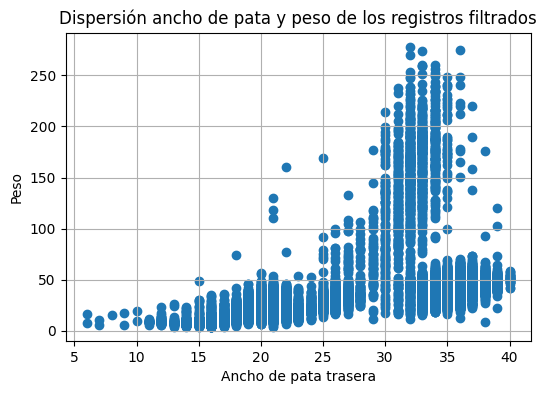

In [10]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conexion = sqlite3.connect("portal_mammals.sqlite")
df = pd.read_sql_query("SELECT hindfoot_length, weight from filtro_surveys1900", conexion)
df = df.dropna()
conexion.close()

columna1 = df['hindfoot_length']
columna2 = df['weight']

# edición del gráfico 
plt.figure(figsize=(6, 4))
plt.scatter(columna1, columna2)
plt.title('Dispersión ancho de pata y peso de los registros filtrados')
plt.xlabel('Ancho de pata trasera')
plt.ylabel('Peso')
plt.grid(True)
plt.show()

Crear tabla de datos desde el SQLite original

In [ ]:
import pandas as pd
import sqlite3

con = sqlite3.connect("portal_mammals.sqlite")

# cargar y filtrar nulos del DataFrame
surveys_df = pd.read_sql_query("SELECT * from surveys", con)
surveys_df = surveys_df.dropna()
# elegir la definición de la columna a separar
surveys1900 = surveys_df[surveys_df.year < 2000] 

# Escribir el nuevo DataFrame a incluir como tabla el la SQLite
surveys1900.to_sql("surveys1900", con, if_exists="replace")

con.close()

In [ ]:
import pandas as pd
import sqlite3

con = sqlite3.connect("portal_mammals.sqlite")

# cargar y filtrar nulos del DataFrame
surveys_df = pd.read_sql_query("SELECT * from surveys", con)
surveys_df = surveys_df.dropna()
# elegir la definición de la columna a separar
surveys2000 = surveys_df[surveys_df.year >= 2000] 

# Escribir el nuevo DataFrame a incluir como tabla el la SQLite
surveys2000.to_sql("surveys2000", con, if_exists="replace")

con.close()

In [9]:
import pandas as pd
import sqlite3

con = sqlite3.connect("portal_mammals.sqlite")

# cargar y filtrar nulos del DataFrame
surveys_df = pd.read_sql_query("SELECT * from surveys", con)
surveys_df = surveys_df.dropna()
# elegir la definición de la columna a separar
filtro_surveys1900 = surveys_df[surveys_df.hindfoot_length < 41] 
filtro_surveys1900 = filtro_surveys1900[filtro_surveys1900.year < 2000]

# Escribir el nuevo DataFrame a incluir como tabla el la SQLite
filtro_surveys1900.to_sql("filtro_surveys1900", con, if_exists="replace")

con.close()

dispersión con mathplotlib

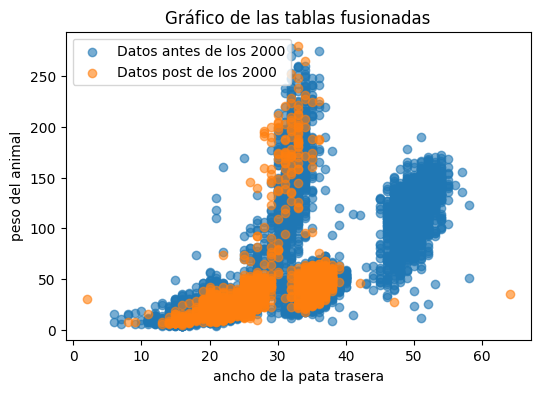

In [80]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

con = sqlite3.connect("portal_mammals.sqlite")
# Consulta SQL para extraer los datos
variable1 = "SELECT hindfoot_length, weight FROM surveys1900"
variable2 = "SELECT hindfoot_length, weight FROM surveys2000"

# Leer los datos en DataFrames de pandas
df1 = pd.read_sql_query(variable1, con)
df2 = pd.read_sql_query(variable2, con)
con.close()

# Extraer las listas de datos
x1 = df1['hindfoot_length'].tolist()
y1 = df1['weight'].tolist()
x2 = df2['hindfoot_length'].tolist()
y2 = df2['weight'].tolist()

# definir variables
plt.figure(figsize=(6, 4))
plt.scatter(x1, y1, label='Datos antes de los 2000', alpha=0.6)
plt.scatter(x2, y2, label='Datos post de los 2000', alpha=0.6)

# editar
plt.xlabel('ancho de la pata trasera')
plt.ylabel('peso del animal')
plt.title('Gráfico de las tablas fusionadas')
plt.legend()
plt.show()

dispersión con plotnine

c:\Users\MPSoft\AppData\Local\Programs\Python\Python37\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 4811 rows containing missing values.


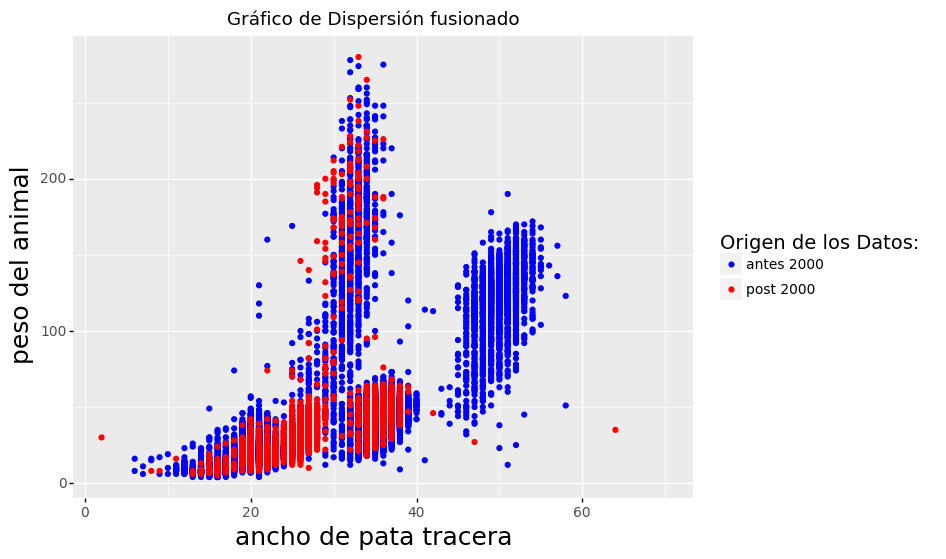

In [79]:
import sqlite3
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme, element_text, scale_color_manual

con = sqlite3.connect("portal_mammals.sqlite")

# Consulta SQL para extraer los datos
variable1 = "SELECT hindfoot_length, weight FROM surveys1900"
variable2 = "SELECT hindfoot_length, weight FROM surveys2000"

# Leer los datos en DataFrames de pandas
df1 = pd.read_sql_query(variable1, con)
df2 = pd.read_sql_query(variable2, con)
con.close()

# Añadir etiqueta para diferenciar los datos
df1['source'] = 'antes 2000'
df2['source'] = 'post 2000'
# Combinar los DataFrames
df_combined = pd.concat([df1, df2])

# Crear el gráfico de dispersión
plot = (ggplot(df_combined, aes(x='hindfoot_length', y='weight', color='source'))
        + geom_point(alpha=1)
        + labs(title='Gráfico de Dispersión fusionado', 
                x='ancho de pata tracera',
                y='peso del animal',
                color='Origen de los Datos:')
        + scale_color_manual(values={'antes 2000': 'blue', 'post 2000': 'red'})
        + theme(figure_size=(8, 6),
                axis_title_x=element_text(size=18),
                axis_title_y=element_text(size=18),
                axis_text_x=element_text(size=10),
                axis_text_y=element_text(size=10),
                legend_title=element_text(size=14),
                legend_text=element_text(size=10)))
print(plot)